# Cleaning Trade Data

In this notebook we will clean the trade data that we extracted from the original player dataset :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# loading data into dataframe
trade_file = "../data/raw/trade_data/trade_data.csv"
trade_data = pd.read_csv(trade_file)

In [3]:
trade_data.head(10)

,player_id,player_name,trade_year,team_traded_from,team_traded_to
0,920,A.C. Green,1993-94,Los Angeles Lakers,Phoenix Suns
1,920,A.C. Green,1996-97,Phoenix Suns,Dallas Mavericks
2,920,A.C. Green,1996-97,Dallas Mavericks,NaN
3,920,A.C. Green,1997-98,NaN,Dallas Mavericks
4,920,A.C. Green,1999-00,Dallas Mavericks,Los Angeles Lakers
5,920,A.C. Green,2000-01,Los Angeles Lakers,Miami Heat
6,2062,A.J. Guyton,2002-03,Chicago Bulls,Golden State Warriors
7,1630639,A.J. Lawson,2022-23,Minnesota Timberwolves,Dallas Mavericks
8,1630639,A.J. Lawson,2022-23,Dallas Mavericks,NaN
9,1630639,A.J. Lawson,2023-24,NaN,Dallas Mavericks


As we can see there are rows that have 'NaN' values which indicate that the player was not traded that particular season. We can simply remove all such rows :

In [4]:
trade_data=trade_data.dropna()

In [7]:
trade_data.head(15)

,player_id,player_name,trade_year,team_traded_from,team_traded_to
0,920,A.C. Green,1993-94,Los Angeles Lakers,Phoenix Suns
1,920,A.C. Green,1996-97,Phoenix Suns,Dallas Mavericks
4,920,A.C. Green,1999-00,Dallas Mavericks,Los Angeles Lakers
5,920,A.C. Green,2000-01,Los Angeles Lakers,Miami Heat
6,2062,A.J. Guyton,2002-03,Chicago Bulls,Golden State Warriors
7,1630639,A.J. Lawson,2022-23,Minnesota Timberwolves,Dallas Mavericks
10,201985,AJ Price,2012-13,Indiana Pacers,Washington Wizards
11,201985,AJ Price,2013-14,Washington Wizards,Minnesota Timberwolves
12,201985,AJ Price,2014-15,Minnesota Timberwolves,Indiana Pacers
13,201985,AJ Price,2014-15,Indiana Pacers,Cleveland Cavaliers


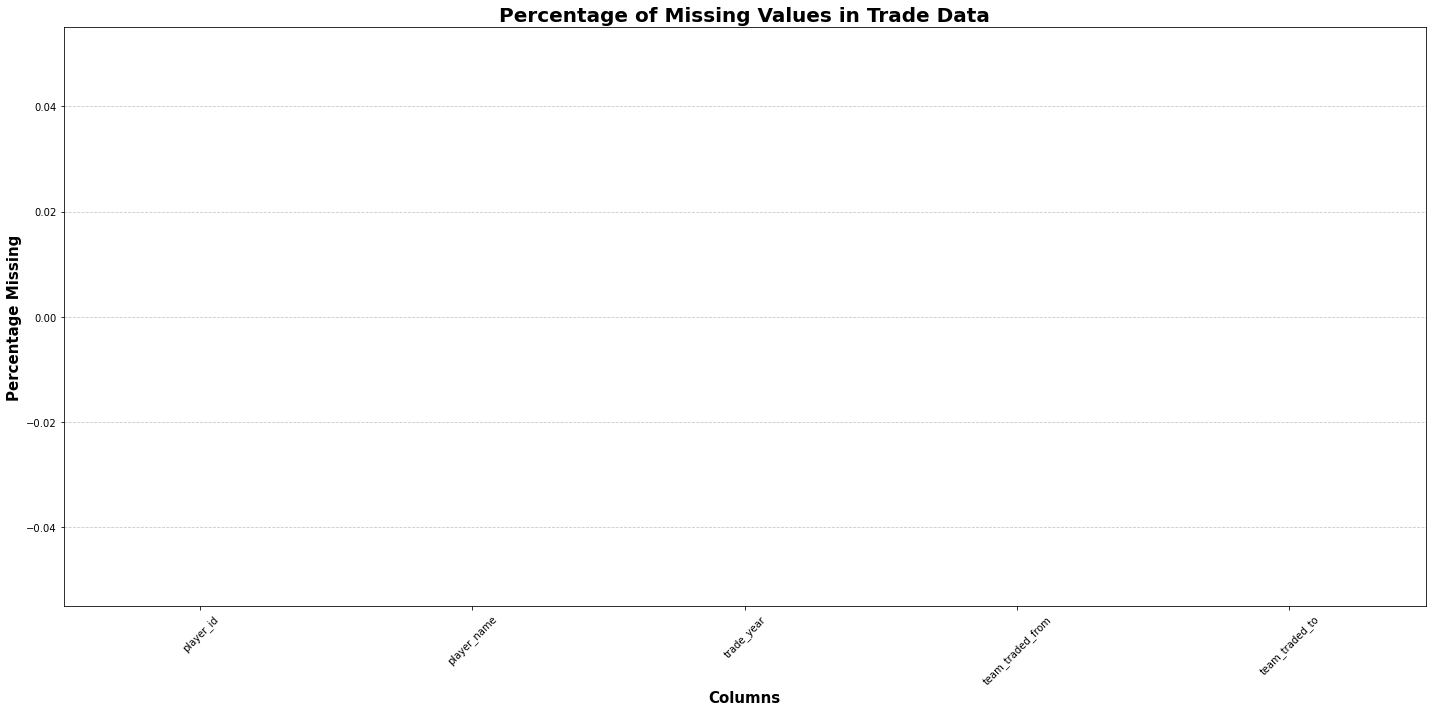

In [28]:
plt.figure(figsize=(20, 10)) 
plot = trade_data.isna().mean().plot(kind='bar')
plot.set_title('Percentage of Missing Values in Trade Data', fontweight='bold', fontsize=20)
plot.set_xlabel('Columns', fontweight='bold', fontsize=15)
plot.set_ylabel('Percentage Missing', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The dataset is now completely cleaned as there are no missing values and we can save this to a csv file : 

In [29]:
output_dir = os.path.join("..", "data", "cleaned", "trade_data")
os.makedirs(output_dir, exist_ok=True)

output_filename = os.path.join(output_dir, "trade_data.csv")
trade_data.to_csv(output_filename, index=False)